# LINEAR REGRESSION
 

AIM: To predict the price of car using linear regression with respect to the independent variables. This can be very detrimental to the business as it helps in understanding how each variable influence the price of car and accordingly change the design or mechanism. 

DATASET DESCRIPTION: The dataset is a car price data from Kaggle; link: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
   * Car_ID
   * Symboling (insurance risk rating,+3 value indicates that it is risky, -3 is safe)
   * carCompany
   * fueltype (type of fuel used)
   * aspiration
   * doornumber
   * carbody (body type of the car)
   * drivewheel
   * enginelocation
   * wheelbase
   * carlength
   * carwidth
   * carheight
   * curbweight (The weight of a car without external object weights)
   * enginetype
   * cylindernumber
   * enginesize
   * fuelsystem
   * boreratio
   * stroke (Volume inside the engine)
   * compressionratio
   * horsepower
   * peakrpm
   * citympg (Mileage in city)
   * highwaympg (Mileage on highway)
   * price (Price of car)

In [58]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error

In [3]:
#lOADING THE DATASET
data= pd.read_csv("C:/Users/carol/Downloads/CarPrice_Assignment.csv")

In [4]:
data.shape

(205, 26)

* The dataset has 206 observations with 26 columns

In [5]:
# To Display all columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


# Exploratory Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Using info() function can help in understanding the dataset and the types of attributes present in the data. Here we see that there are 10 categorical attributes, 16 numerical out of which 8 are integer and 8 are floating point values.

In [9]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


describe() function is important in getting statistical inference of the dataset. 
Price: The minimum price of the car seen is 5118 and the maximum seen is 45400. the mean and median values are 13276.7 and 10295 respectively. the mean being greater than median shows that the values are right skewed(positively). 

In [10]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no null values present in the dataset.

In [11]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [12]:
#to convert the car name to its company name
data['CarName'] = data['CarName'].str.lower()
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)

In [13]:
def replace_name(a,b):
    data['CompanyName'].replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [14]:
data['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
data

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [17]:
#getting the numerical and categorical attributes separately
num = data.select_dtypes(exclude = 'object')
cat = data.select_dtypes(include = 'object')
num=num.drop(columns=['car_ID'],axis=1)

In [18]:
num.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [19]:
cat.columns

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

UNIVARIATE ANALYSIS- VISUALISATION

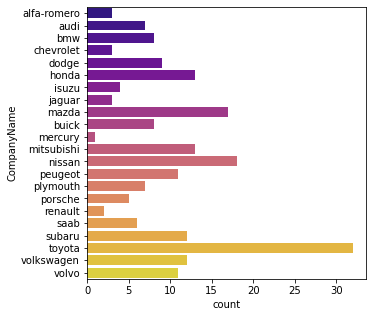

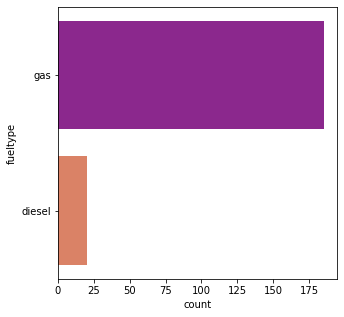

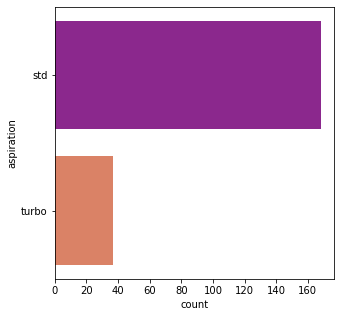

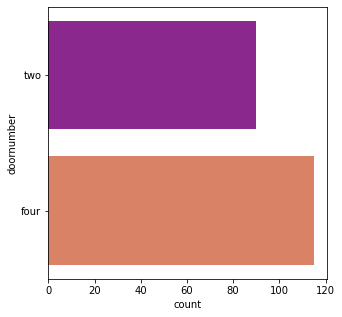

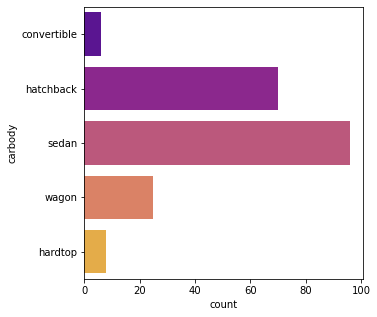

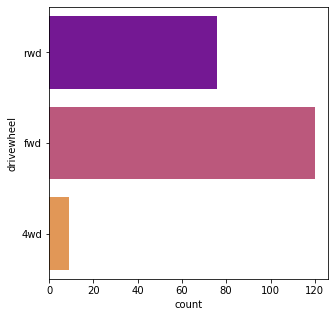

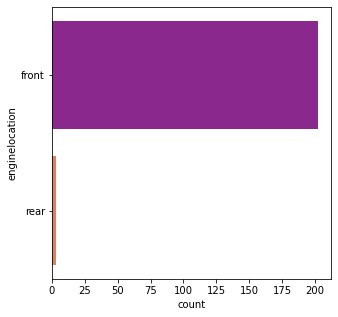

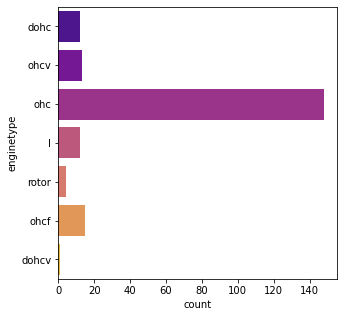

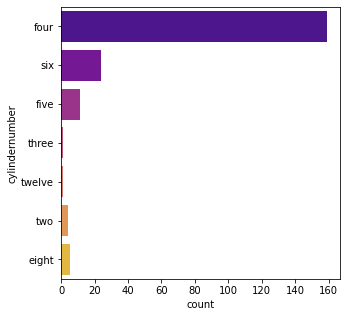

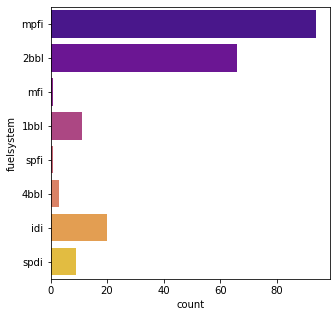

In [20]:
#Countplot for categorical variables
for i in cat.columns:
  plt.figure(figsize=(5,5))
  sns.countplot(y=data[i],palette='plasma')

From the above count plots we see the total counts of the each observation under the categorical variables. 
* Out of all the cars, toyota brand is the most preferred. 
* From the entire observations of cars, the number of gas fueled cars are more than diesel.
* Cars with standard aspiration is preferred highly than the turbo
* Cars with 4 doors are more than the ones with 2
* Majority of car body are sedan, followed by hatchback
* Only very few cars are having rear engine location, with ohc engine type as the most used


<AxesSubplot:xlabel='symboling', ylabel='count'>

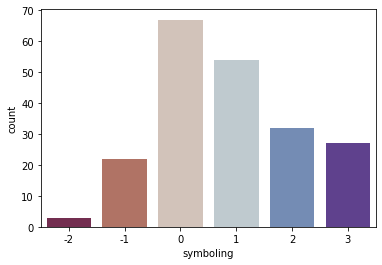

In [21]:
sns.countplot(data['symboling'],palette='twilight_shifted_r')

Symboling is a value that shows how safe the travel is. A value of +3 indicates that it is risky, -3 that it is probably pretty safe. the count plot shows that most of the car has a value of 0 which shows that it is neither too risky nor too safe.

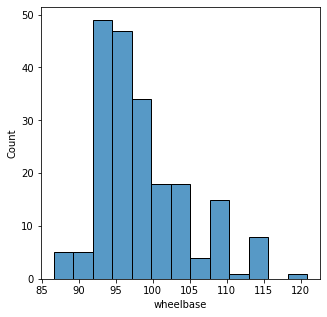

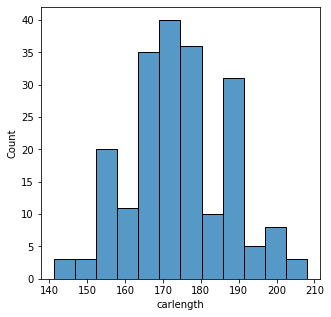

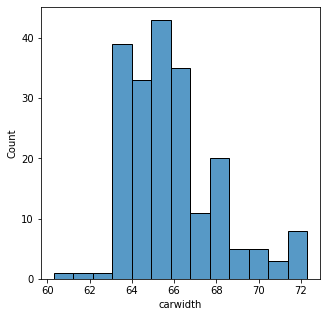

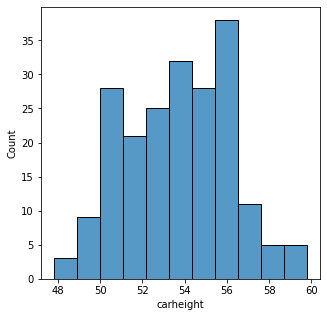

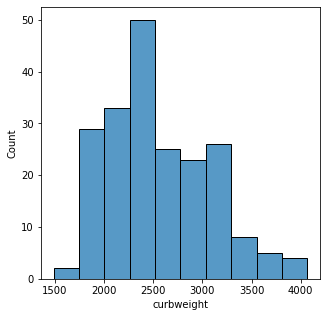

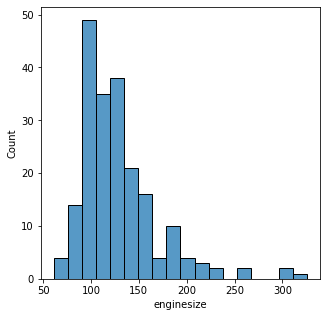

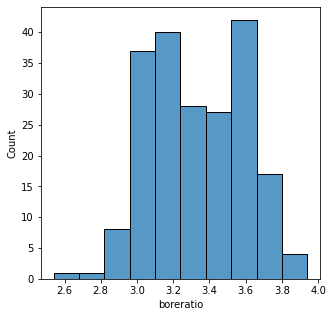

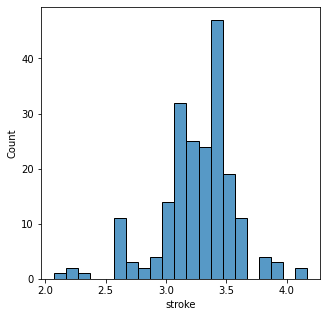

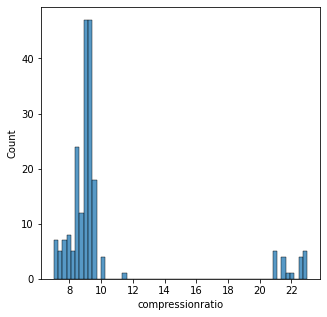

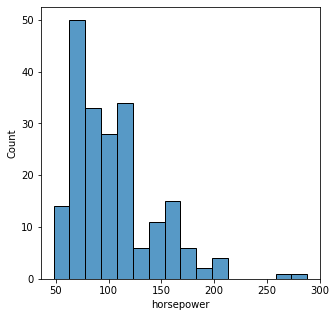

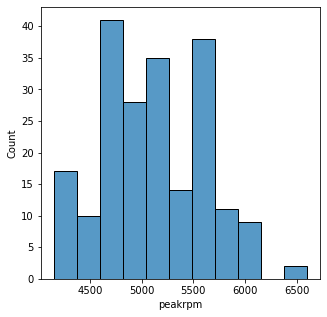

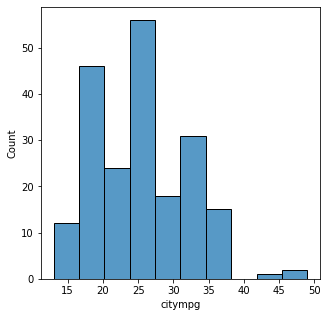

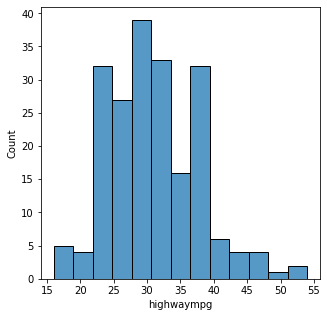

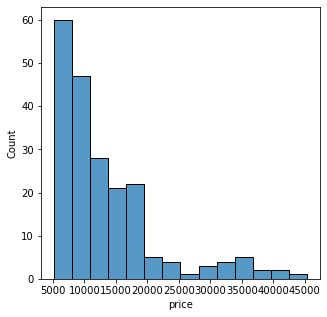

In [22]:
#HISTOGRAM ANALYSIS
for i in num.drop(columns='symboling',axis=1).columns:
  plt.figure(figsize=(5,5))
  sns.histplot(num[i])

In [36]:
data.skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

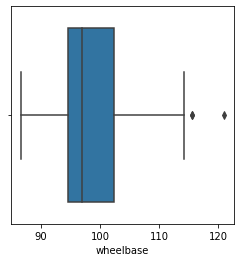

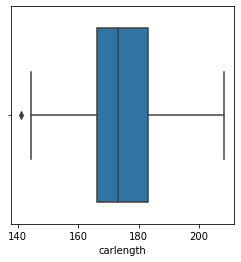

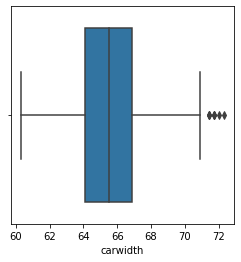

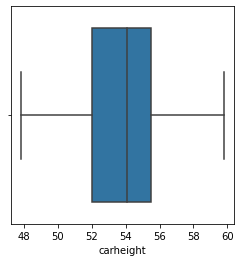

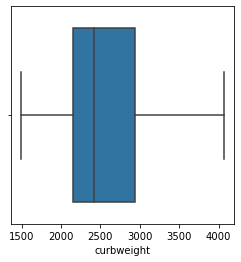

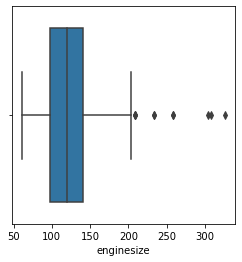

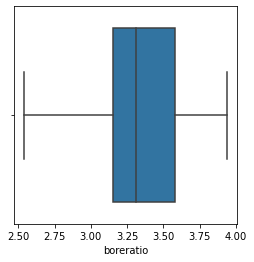

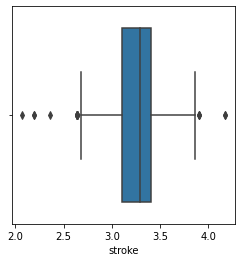

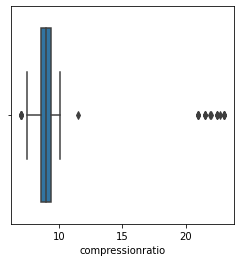

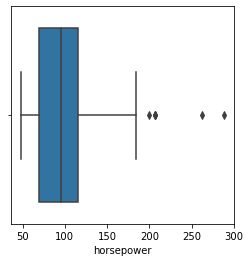

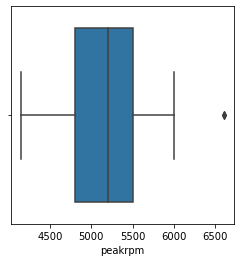

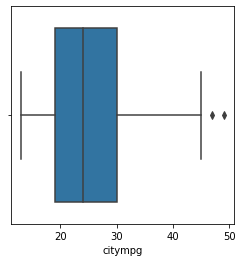

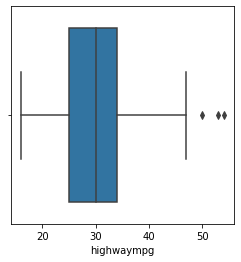

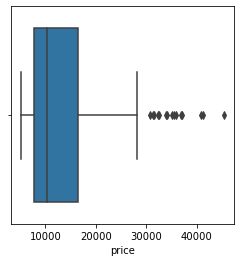

In [33]:
#BOXPLOT ANALYSIS
for i in num.drop(columns='symboling',axis=1).columns:
  plt.figure(figsize=(4,4))
  sns.boxplot(num[i])

Boxplot is an important visualisation chart that helps in showing the presence of extreme outliers present in the data and to show the spread middle 50% of data. 
* There are no significant outliers present in the data
* The price of most of the cars is seen to be around 8,000 to 17,000, with median around 10,000

BIVARIATE ANALYSIS- VISUALISATION

<AxesSubplot:xlabel='price', ylabel='CompanyName'>

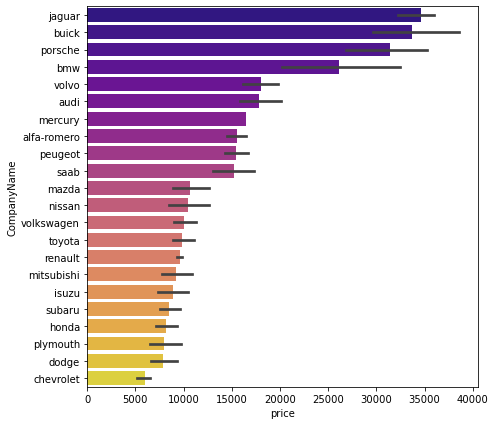

In [40]:
plt.figure(figsize=(7,7))
sns.barplot(data=data, x='price', y='CompanyName',palette='plasma',order=data.groupby('CompanyName')['price'].agg('mean').sort_values(ascending=False).index)

<AxesSubplot:title={'center':'Price distribution according to fueltype'}, xlabel='fueltype', ylabel='price'>

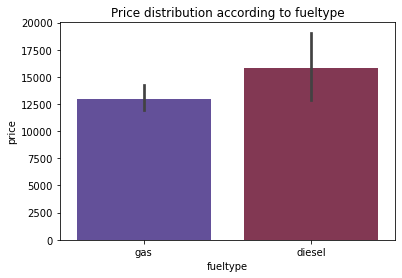

In [59]:
plt.title('Price distribution according to fueltype')
sns.barplot(data=data, x='fueltype', y='price',palette='twilight')

* From the above bar graph, it can be seen that Jaguar has highest average price(around 35000), followed by Buick and porsche. Chevrolet has the lowest average price of around 6000.

* The average price of diesel car is higher compared to that of cars running on petrol.

<AxesSubplot:title={'center':'Door Number vs Price'}, xlabel='doornumber', ylabel='price'>

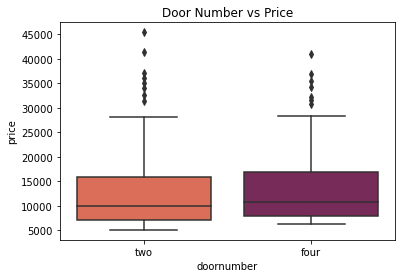

In [40]:
plt.title('Door Number vs Price')
sns.boxplot(data=data,x='doornumber', y='price', palette=('rocket_r'))

<AxesSubplot:title={'center':'Price distribution according to cylinder number'}, xlabel='cylindernumber', ylabel='price'>

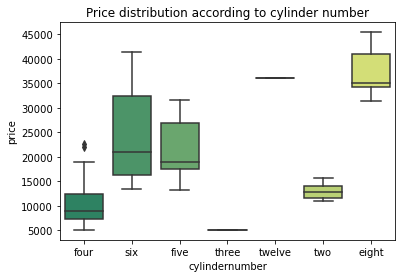

In [51]:
plt.title('Price distribution according to cylinder number')
sns.boxplot(x = 'cylindernumber', y = 'price', data = data,palette='summer')

<AxesSubplot:title={'center':'Price distribution with respect to engine type'}, xlabel='enginetype', ylabel='price'>

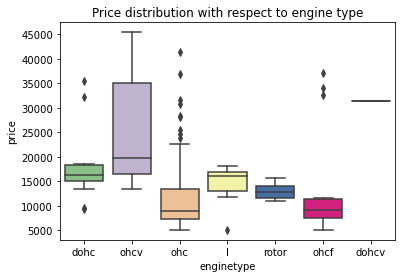

In [52]:
plt.title('Price distribution with respect to engine type')
sns.boxplot(x = 'enginetype', y = 'price', data = data,palette='Accent')

* the price distribution of cars with 2 doors and 4 doors are somewhat similar
* price range of ohcv engine cars are quite high in compare to others
* there is only 1 car having 3 and 12 cylinders, and car having eight cylinder shows higher price range.

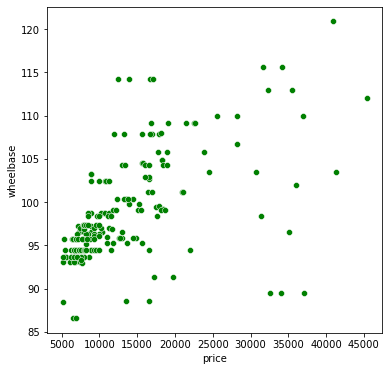

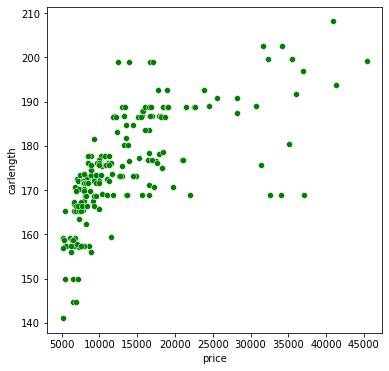

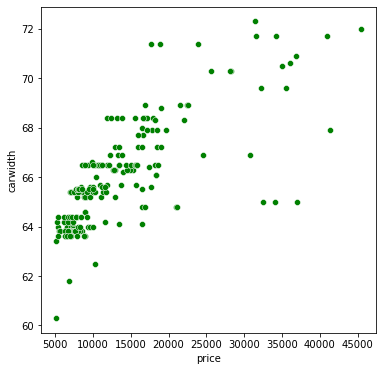

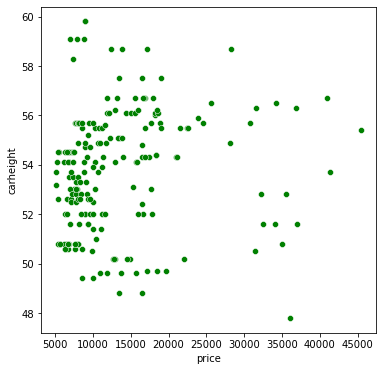

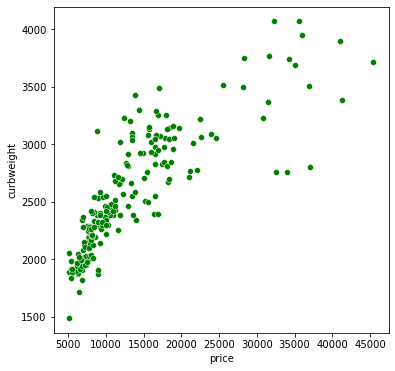

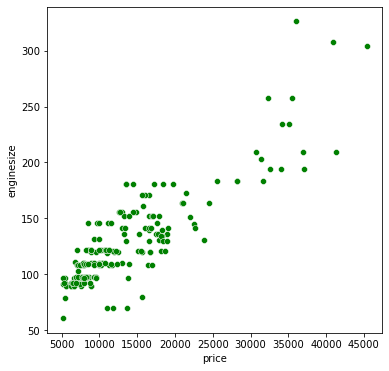

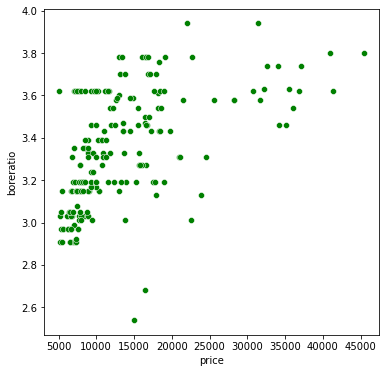

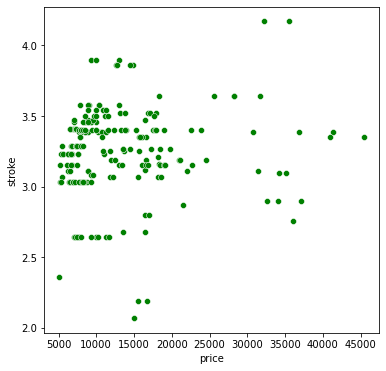

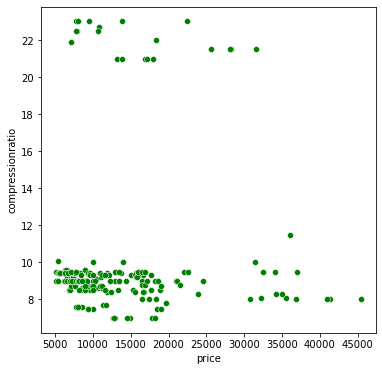

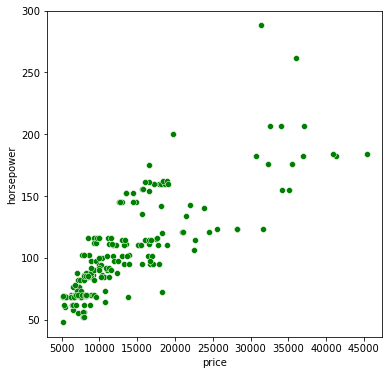

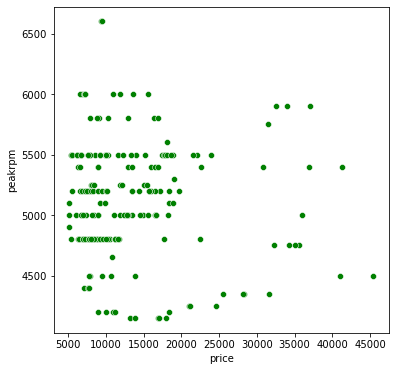

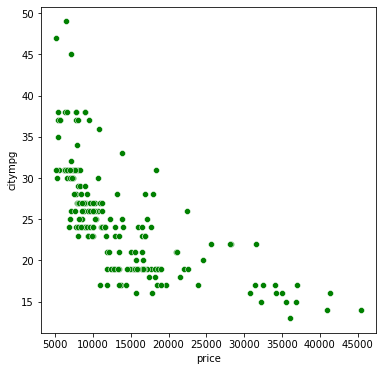

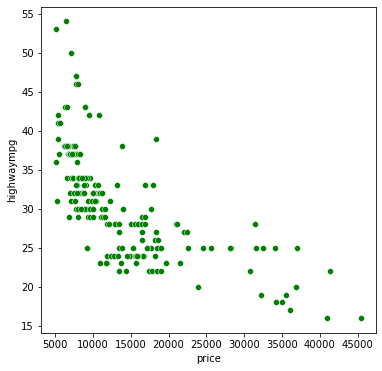

In [58]:
#SCATTER PLOT ANALYSIS
for i in num.drop(columns=['price','symboling'],axis=1):
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=num,x='price',y=i, color='green')

Scatter plot is used to understand the relationship between 2 numerical variables. Since price of the car is the dependent variable, relationship of the other variables along with price can be studied.

* The attributes wheelbase, carlength, carwidth, curbweight, enginesize and horsepower are seen to have a positive relation with the price of the car. 
* citympg and highwaympg is seen to have negative relation with the price. That is, price is seen to increase with decline in citympg and highwaympg.

<AxesSubplot:title={'center':'Correlation between variables'}>

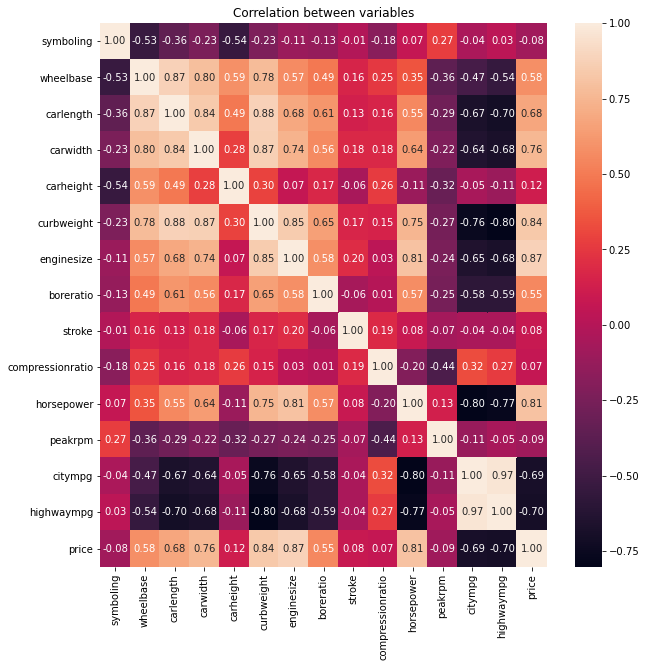

In [56]:
# CORRELATION HEATMAP
plt.figure(figsize = (10,10))
plt.title('Correlation between variables')
corr = num.corr()
sns.heatmap(corr, annot = True, fmt = ".2f")

* wheelbase, carlength, carwidth, curbweight, enginesize, horsepower, boreratio are having positive correlation with price (more than 0.5)
* citympg and highwaympg has negative correlation with price (-0.69 and -0.70 respectively), but it can be observed that citympg and highwaympg have very strong correlation of 0.97. 

# MODEL BUILDING

In [338]:
# Dependent variable 
y=data['price']

In [339]:
# one hot encoder is used to get convert the categorical variables before building model
car_df = pd.get_dummies(data, drop_first=True)

In [340]:
car_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [341]:
x=car_df.drop(['car_ID','price'],axis=1)

here price and car ID are dropped because they are dependent variable and CarID is not a determinant of price.

*  MODEL 1

In [342]:
# The dataset is split into training and testing dataset in the ratio 80:20.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) 
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [343]:
y_pred=linear_reg.predict(x_test)
print("the predictions of the test dataset using the model: \n",y_pred)

the predictions of the test dataset using the model: 
 [29778.5170846  21742.73235495 11134.24819083 12506.64100721
 30073.8111985   6788.18571244  7677.1953874   7230.80555871
  9508.13260147  7862.71015641 13097.80324928  6066.12944487
 15683.92019416  9778.86619272 43331.59759887  6485.70709762
 -1649.20120797 13667.81650849  9059.6705036   9715.14876292
 11402.91949037 15642.67815999  7618.84115101  4426.68068426
  7018.97183018 30433.84861255 11186.1184046  15877.57032403
  6450.38206532 16107.20363049 29540.37129668  6670.05637912
  5027.36258124 17906.35714948  7804.09308803 28920.36571106
 11746.89186227 12728.50500572  9073.98451532 14239.85999686
  8323.45753642]


In [344]:
from sklearn.metrics import r2_score
acc1=r2_score(y_test,y_pred)
print("the accuracy r2 score: ",acc1)

the accuracy r2 score:  0.909701245209357


* MODEL 2 (Forward selection)

In [345]:
corr=data.corr()

In [346]:
# Taking absolute value of correlation values and displaying in descending order will help in easier selection of features for model building
c_ab=abs(data.corr()['price'])
c_ab.sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
car_ID              0.109093
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

FORWARD SELECTION

* The attributes symboling is not contributing to the change in price of the cars. 
* Compressionratio and the stroke is also having very less correlation of less than 0.07. thereby, we can remove these attributes from the set of independent variables.

In [347]:
x=x.drop(columns=['symboling','compressionratio','stroke'])

In [348]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
linear_reg.fit(x_train,y_train)

LinearRegression()

In [349]:
y_pred2=linear_reg.predict(x_test)
y_pred2

array([29526.63788495, 21002.90306738, 11078.90919752, 12443.47420161,
       30010.161023  ,  6751.10798294,  7551.34724587,  7143.10180395,
        9593.60522159,  7819.3512275 , 13140.50542349,  5714.37327228,
       15225.17677239,  9848.40101908, 43423.45145719,  6605.57451698,
       -1233.744109  , 13882.87315747,  9004.30118439,  9750.74311974,
       11400.75668853, 15654.1827549 ,  7767.7652149 ,  4389.40390742,
        7250.14479544, 30022.2952961 , 11272.5420797 , 15955.05753407,
        6669.4797166 , 15913.35822685, 29414.71072071,  6758.82705598,
        5011.76621119, 17784.05241043,  7526.37866119, 28664.17196047,
       11504.06736375, 12728.08580858,  9166.90776784, 14464.52316606,
        8336.5229922 ])

In [351]:
acc2=r2_score(y_test,y_pred2)
acc2

0.9082035628498046

* MODEL 3 (BACK ELIMINATION)

Back elimination is done by removing the independent attributes which does not affect the price of the car.

P-values are a measure of how important a feature is. A p-value is a threshold value. A feature with value above this will be removed. here we have set the p value threshold as 0.05.  

The OLS() function to perform Ordinary Least Square regression and summary() gives an overview of the regression results

In [352]:
lm = sm.OLS(y,x).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     71.20
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.45e-83
Time:                        16:50:16   Log-Likelihood:                -1788.7
No. Observations:                 205   AIC:                             3693.
Df Residuals:                     147   BIC:                             3886.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wheelbase                257

* R2 – It tells about the goodness of the fit. It ranges between 0 and 1. The closer the value to 1, the better it is. here the value is 0.966 which is very close to 1. 

* Skew – Informs about the data symmetry about the mean.(here 1)

* F-statistic : It determines the significance of the model

BACK ELIMINATION

dropping of attributes should stick to rules as well as need some domain knowledge on th importance of the attributes to the price of the car. Here, we have removed 4 attributes, which are citympg, compressionratio, stroke and symboling. 
* the p value of citympg is extremely high with a value of 0.59 which is way beyond the threshold(0.05). Also, citympg and highwaympg are highly correlated as seen from the exploratory data analysis. In order to ensure that there is no multicollinearity, citympg can be removed.
* the p value of horsepower is also high(0.64), but since horsepower is having great importance in the price of car, it cannot be dropped.

In [353]:
x=x.drop(columns=['citympg'])

In [355]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
linear_reg.fit(x_train,y_train)


LinearRegression()

In [359]:
y_pred3=linear_reg.predict(x_test)
y_pred3

array([29548.44314109, 20953.81581141, 11054.62367696, 12428.23371614,
       29979.50002611,  6744.01875639,  7351.73006609,  7116.63117729,
        9496.09552282,  7672.52547639, 13186.72456758,  5749.61732323,
       15150.903966  ,  9865.5527135 , 43473.27763362,  6542.34284284,
       -1394.10998486, 13955.86220009,  8985.22969225,  9686.40698325,
       11425.88185327, 15659.50242307,  7763.38761423,  4657.12608013,
        7262.03104602, 30042.28314471, 11259.74187557, 15958.78590004,
        6665.53802303, 15936.79355787, 29393.020895  ,  6701.38952326,
        4921.80048522, 17720.08198053,  7491.78672317, 28616.39400617,
       11428.22857719, 12727.76066085,  9226.45097017, 14549.91324499,
        8372.72616627])

In [362]:
acc3=r2_score(y_test,y_pred3)
print("the accuracy r2 score: ",acc3)

the accuracy r2 score:  0.9082035628498046


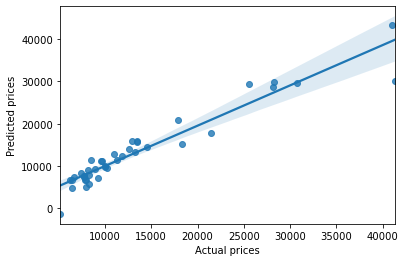

In [364]:
sns.regplot(x=y_test, y=y_pred3)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()

# CONCLUSION

The model was built in order to forecast the price of cars using the different features related to the car. 

Initially the required libraries were imported and dataset was loaded. 

Data preprocessing was done in order to make the data clean before building the model.

Exploratory data analysis is done in order to get insights regarding the data, i.e to get an understanding on the features of cars. 

Visualisation are made to get the inferences easily.

Features that contribute to the price of cars are selected to build the model. 

Further the multiple linear regression model is built. 

The accuracy of the model is pretty good with around 91%. R2 Score is another metric to evaluate performance of a regression model.
The model built with all the attributes and after removing few variables is same.

This model is reliable enough to predict the price of cars. 